In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("bank-full.csv", delimiter=";")

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Data Preparation 
- Select only chosen features
- Check if the missing values are presented in the features.

In [18]:
unused_features = ['default', 'loan', 'preious']
features_used = [feat for feat in data.columns.to_list() if feat not in unused_features]

In [19]:
data[features_used]

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


## Q1 : Mode for the column `education

In [20]:
data['education'].value_counts(normalize=True)

education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: proportion, dtype: float64

## Q2 : Two features with the biggest correlation 

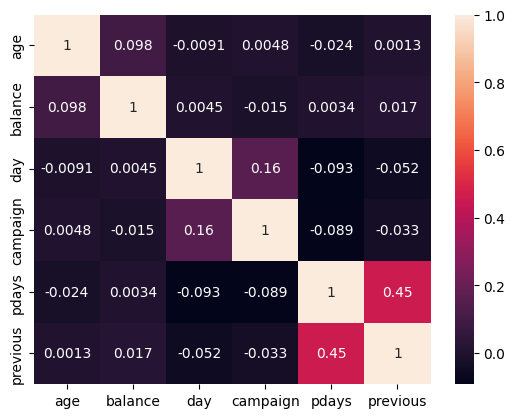

In [25]:
features_q2 = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

# using seaborn heatmap
import seaborn as sns
sns.heatmap(data[features_q2].corr(), annot=True)
plt.show()

### Target encoding

In [27]:
data.y = np.where(data.y=='yes', 1, 0)
data.y.value_counts(normalize=True)

y
0    0.883015
1    0.116985
Name: proportion, dtype: float64

## Split the data

In [29]:
from sklearn.model_selection import train_test_split 

data_full_train, data_test = train_test_split(data, test_size=0.2, random_state=42)
data_train, data_val = train_test_split(data_full_train, test_size=0.25, random_state=42)

data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

y_train = data_train.y.values
y_val = data_val.y.values
y_test = data_test.y.values

del data_train['y']
del data_val['y']
del data_test['y']

## Q3 : Variable with the biggest mutual information score

In [33]:
from sklearn.metrics import mutual_info_score

def mutual_info_q3(series):
    return mutual_info_score(series, data_full_train.y)

mi_q3 = data_full_train[['contact', 'education', 'housing', 'poutcome']].apply(mutual_info_q3)
mi_q3.sort_values(ascending=False)


poutcome     0.029257
contact      0.014164
housing      0.009800
education    0.002458
dtype: float64

## Q4 :  Accuracy on the validation dataset

## Q5 : Feature with the smallest difference

## Q6 : Smallest `C` that leads to the best accuracy on the validation set